# Experiment's Exploratory Data Analisys

Explores the results of the experiments.

In [19]:
%matplotlib inline
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pymongo import MongoClient

db = MongoClient().imdbws
df = pd.DataFrame(list(db.exp_1.find())).set_index('_id')
df = df.drop(['title', 'ypct_rating', 'ypct_votes'], axis=1)

Best features by correlation to `ypct` and `top100`:

In [20]:
c = df[df.columns.drop(labels=['top100'])].corr(method='spearman')['ypct']
order = c.abs().sort_values(ascending = False).index
print(c[order].iloc[1:].head(10))

ego_previous_votes_median            0.719557
ego_previous_votes_maximum           0.710650
ego_previous_votes_mean              0.709027
team_previous_votes                  0.683472
ego_previous_votes_minimum           0.557513
ego_previous_rating_std_dev          0.490661
pair_shared_collaborators_maximum    0.342862
pair_shared_collaborators_mean       0.341520
team_size                            0.335847
team_closeness                       0.331975
Name: ypct, dtype: float64


In [21]:
result = []
for x in df.columns:
    if 'previous' in x:
        filled = df[x].fillna(df[x].dropna().min())
    else:
        filled = df[x]
    c = stats.pointbiserialr(filled, df['top100'])
    result.append((c.correlation, c.pvalue, x))
for x in sorted(result, key=lambda x: abs(x[0]), reverse=True)[:10]:
    print("{:35} {:.4f} (p-value: {:.4f})".format(x[2], x[0], x[1]))

top100                              1.0000 (p-value: 0.0000)
ego_previous_votes_mean             0.4617 (p-value: 0.0000)
ego_previous_votes_median           0.4531 (p-value: 0.0000)
team_previous_votes                 0.4346 (p-value: 0.0000)
ego_previous_votes_maximum          0.4341 (p-value: 0.0000)
ego_previous_votes_minimum          0.3874 (p-value: 0.0000)
ego_previous_rating_std_dev         0.3843 (p-value: 0.0000)
ego_previous_rating_maximum         0.3517 (p-value: 0.0000)
ego_previous_rating_median          0.3076 (p-value: 0.0000)
ego_previous_rating_mean            0.3069 (p-value: 0.0000)


## Previous Votes

Scatter plot of `previous_votes` features and `ypct`:

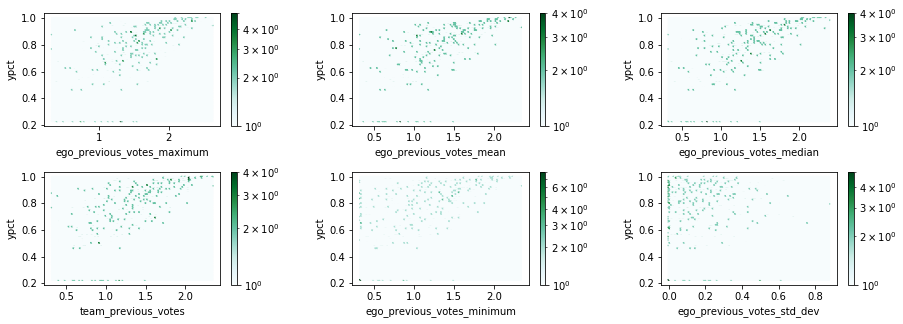

In [23]:
f = ['ego_previous_votes_maximum',
'ego_previous_votes_mean',
'ego_previous_votes_median',
'team_previous_votes',
'ego_previous_votes_minimum',
'ego_previous_votes_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')

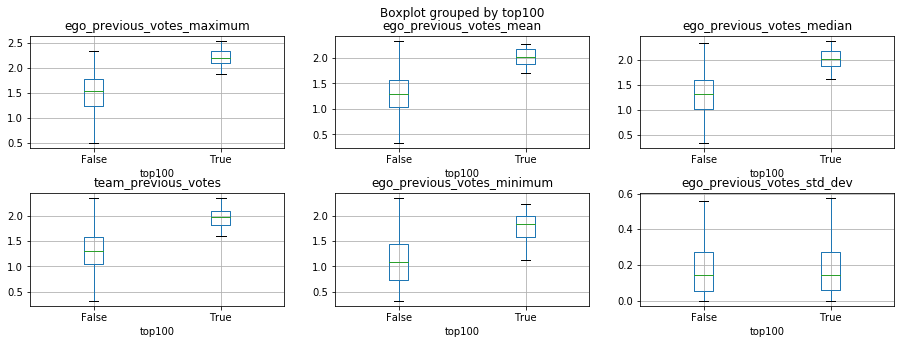

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])


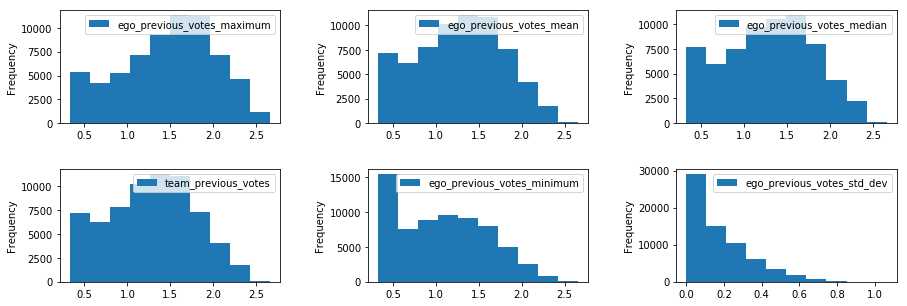

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

Plot with boxplots of `ego_previous_votes_maximum` every year:

In [7]:
dfx[f].corr()

,ego_previous_votes_maximum,ego_previous_votes_mean,ego_previous_votes_median,team_previous_votes,ego_previous_votes_minimum,ego_previous_votes_std_dev,ypct,year
ego_previous_votes_maximum,1.000000,0.937228,0.924667,0.909618,0.726583,0.381499,0.698452,0.220110
ego_previous_votes_mean,0.937228,1.000000,0.988789,0.962474,0.908854,0.052633,0.690541,0.219348
ego_previous_votes_median,0.924667,0.988789,1.000000,0.953693,0.872927,0.080828,0.689107,0.220553
team_previous_votes,0.909618,0.962474,0.953693,1.000000,0.864288,0.078292,0.672401,0.227421
ego_previous_votes_minimum,0.726583,0.908854,0.872927,0.864288,1.000000,-0.345289,0.563738,0.178561
ego_previous_votes_std_dev,0.381499,0.052633,0.080828,0.078292,-0.345289,1.000000,0.179488,0.060372
ypct,0.698452,0.690541,0.689107,0.672401,0.563738,0.179488,1.000000,0.119608
year,0.220110,0.219348,0.220553,0.227421,0.178561,0.060372,0.119608,1.000000


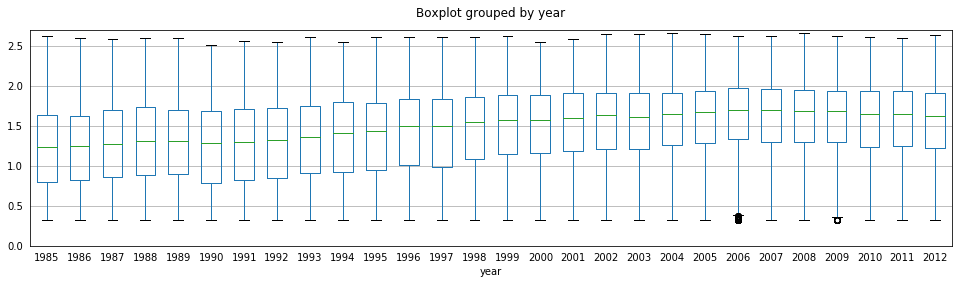

In [8]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_previous_votes_maximum', by='year', figsize=(16,4), widths=0.6)
ax.set_ylim(0, 2.7)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Previous Ratings

Scatter plot of `previous_ratings` features and `ypct`:

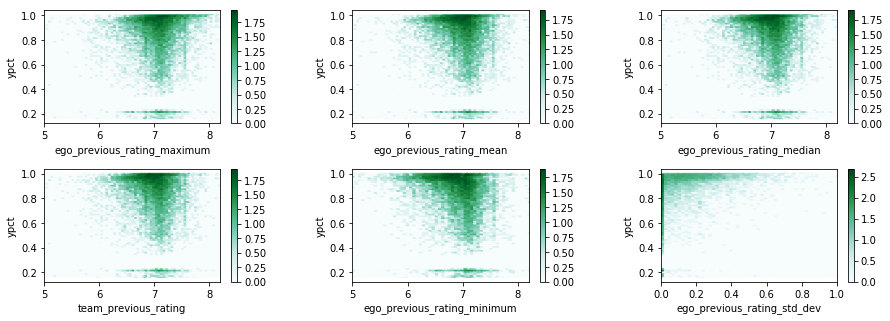

In [9]:
f = ['ego_previous_rating_maximum',
'ego_previous_rating_mean',
'ego_previous_rating_median',
'team_previous_rating',
'ego_previous_rating_minimum',
'ego_previous_rating_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    if i != 5:
        ax.set_xlim(5, 8.2)
    else:
        ax.set_xlim(0, 1)

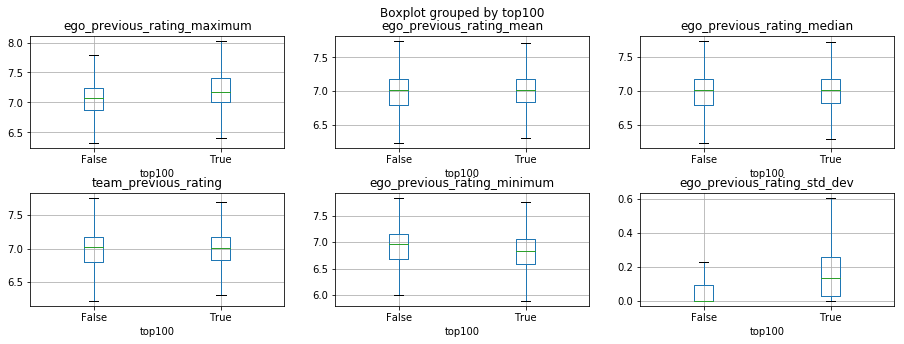

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

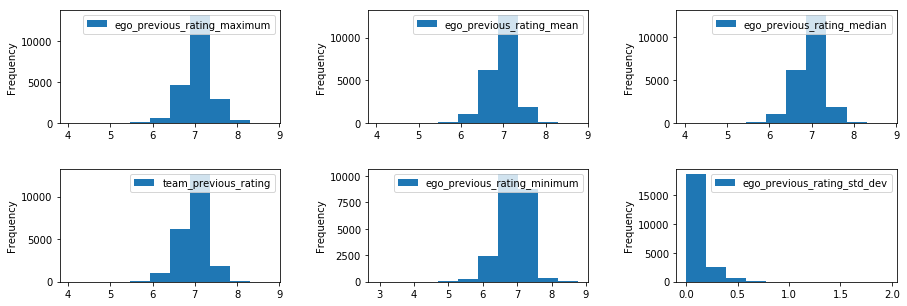

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

In [12]:
dfx[f].corr()

,ego_previous_rating_maximum,ego_previous_rating_mean,ego_previous_rating_median,team_previous_rating,ego_previous_rating_minimum,ego_previous_rating_std_dev,ypct,year
ego_previous_rating_maximum,1.000000,0.897586,0.877002,0.878194,0.667292,0.283830,0.026605,-0.108670
ego_previous_rating_mean,0.897586,1.000000,0.989286,0.974131,0.917394,-0.149521,-0.111232,-0.129562
ego_previous_rating_median,0.877002,0.989286,1.000000,0.964716,0.894059,-0.143488,-0.109476,-0.125955
team_previous_rating,0.878194,0.974131,0.964716,1.000000,0.888877,-0.133508,-0.109034,-0.137002
ego_previous_rating_minimum,0.667292,0.917394,0.894059,0.888877,1.000000,-0.514440,-0.215401,-0.128275
ego_previous_rating_std_dev,0.283830,-0.149521,-0.143488,-0.133508,-0.514440,1.000000,0.300472,0.034220
ypct,0.026605,-0.111232,-0.109476,-0.109034,-0.215401,0.300472,1.000000,0.119608
year,-0.108670,-0.129562,-0.125955,-0.137002,-0.128275,0.034220,0.119608,1.000000


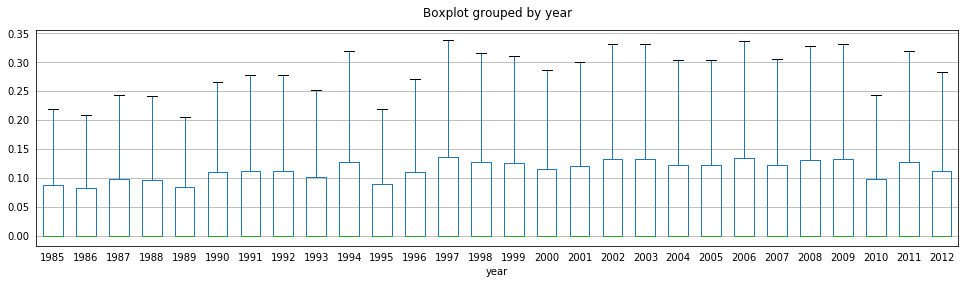

In [13]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_previous_rating_std_dev', by='year', figsize=(16,4), showfliers=False, widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Closeness

Scatter plot of `closeness` features and `ypct`:

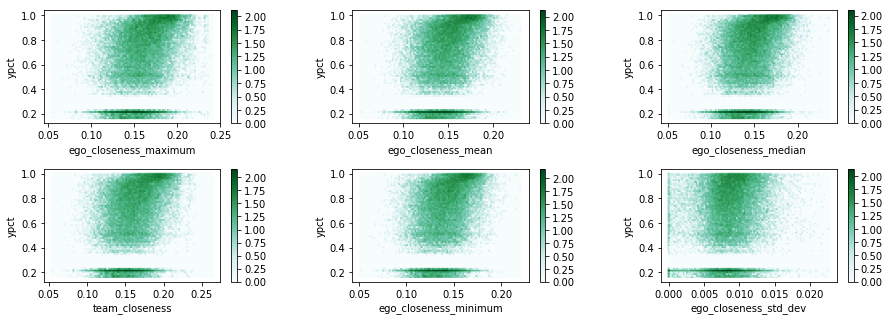

In [14]:
f = ['ego_closeness_maximum',
'ego_closeness_mean',
'ego_closeness_median',
'team_closeness',
'ego_closeness_minimum',
'ego_closeness_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

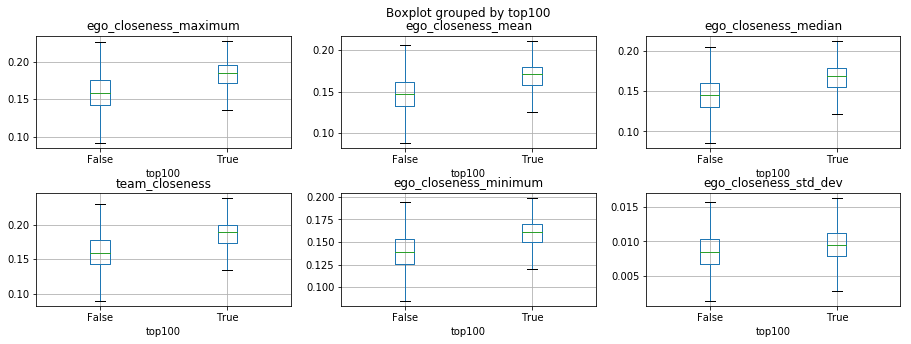

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

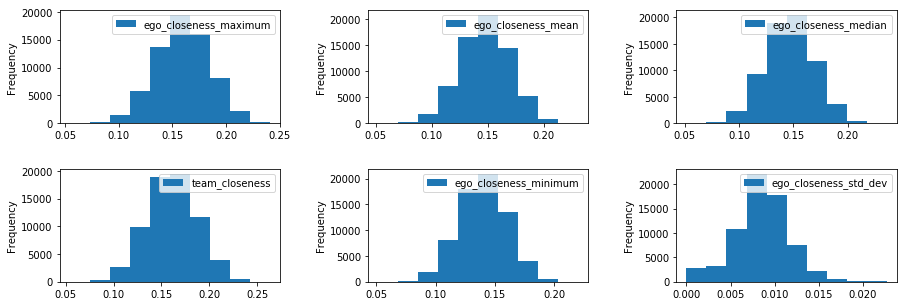

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

In [17]:
dfx[f].corr()

,ego_closeness_maximum,ego_closeness_mean,ego_closeness_median,team_closeness,ego_closeness_minimum,ego_closeness_std_dev,ypct,year
ego_closeness_maximum,1.000000,0.981174,0.947358,0.996016,0.969540,0.634885,0.344898,-0.136398
ego_closeness_mean,0.981174,1.000000,0.987620,0.985298,0.989709,0.526841,0.330434,-0.155664
ego_closeness_median,0.947358,0.987620,1.000000,0.956241,0.969127,0.472968,0.314747,-0.161138
team_closeness,0.996016,0.985298,0.956241,1.000000,0.975143,0.596655,0.360479,-0.132043
ego_closeness_minimum,0.969540,0.989709,0.969127,0.975143,1.000000,0.443458,0.336389,-0.152447
ego_closeness_std_dev,0.634885,0.526841,0.472968,0.596655,0.443458,1.000000,0.140660,-0.060143
ypct,0.344898,0.330434,0.314747,0.360479,0.336389,0.140660,1.000000,0.119608
year,-0.136398,-0.155664,-0.161138,-0.132043,-0.152447,-0.060143,0.119608,1.000000


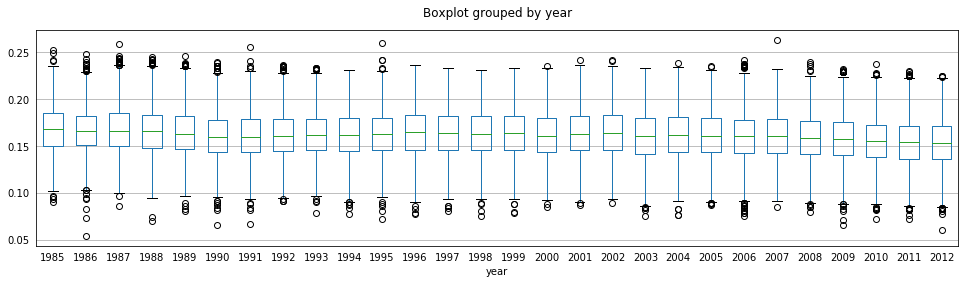

In [18]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_closeness', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Team Size

Scatter plot of `team_size` and `ypct`:

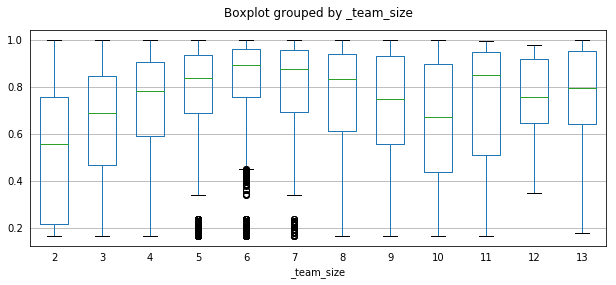

In [19]:
df['_team_size'] = df.team_size.map(lambda x: x if x < 13 else 13)
ax = df.boxplot('ypct', by='_team_size', figsize=(10,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

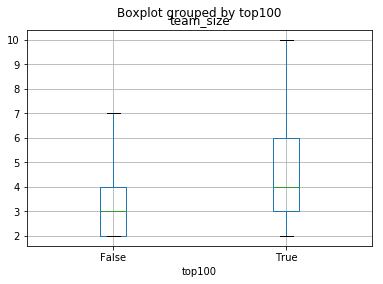

In [20]:
_ = df.boxplot('team_size', by='top100', showfliers=False)

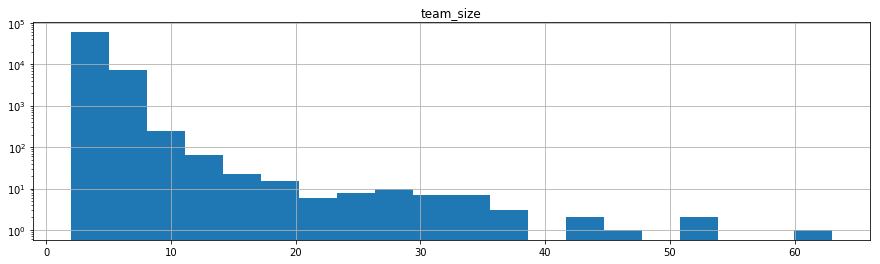

In [21]:
ax = df.hist('team_size', log=True, bins=20, figsize=(15,4))

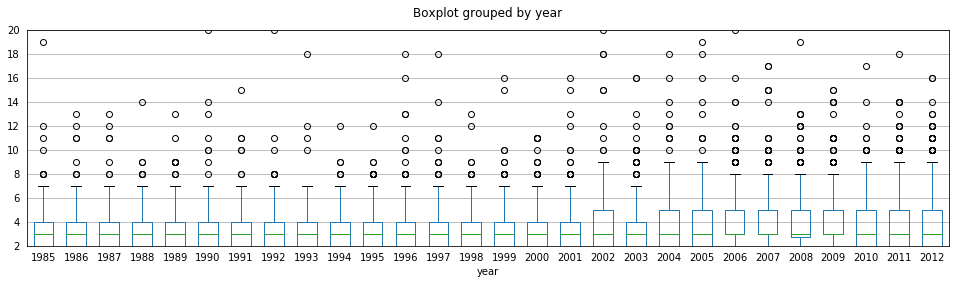

In [22]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_size', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(2, 20)
ax.xaxis.grid(False)

## Network Constraint

Scatter plot of `network_constraint` features and `ypct`:

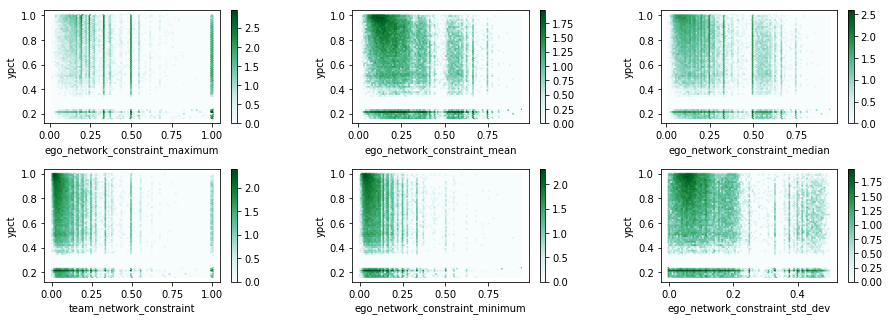

In [23]:
f = ['ego_network_constraint_maximum',
'ego_network_constraint_mean',
'ego_network_constraint_median',
'team_network_constraint',
'ego_network_constraint_minimum',
'ego_network_constraint_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

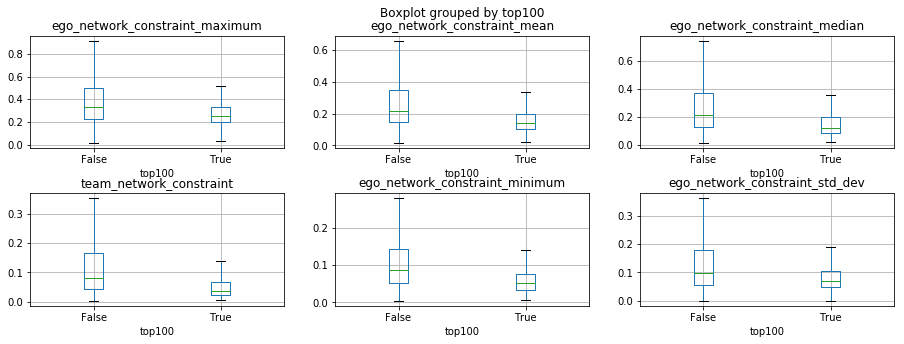

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

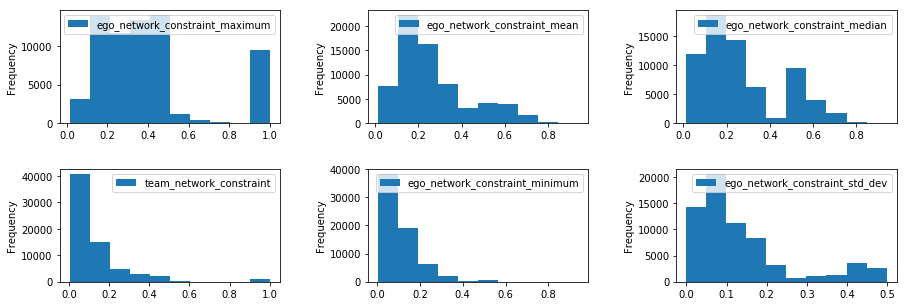

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index])

In [26]:
dfx[f].corr()

,ego_network_constraint_maximum,ego_network_constraint_mean,ego_network_constraint_median,team_network_constraint,ego_network_constraint_minimum,ego_network_constraint_std_dev,ypct,year
ego_network_constraint_maximum,1.000000,0.948677,0.865589,0.417590,0.473208,0.945824,-0.296752,0.011426
ego_network_constraint_mean,0.948677,1.000000,0.962457,0.612079,0.680126,0.817499,-0.333074,0.019347
ego_network_constraint_median,0.865589,0.962457,1.000000,0.596117,0.635225,0.744403,-0.320309,0.030669
team_network_constraint,0.417590,0.612079,0.596117,1.000000,0.860643,0.156550,-0.231247,0.029679
ego_network_constraint_minimum,0.473208,0.680126,0.635225,0.860643,1.000000,0.171443,-0.279690,0.001845
ego_network_constraint_std_dev,0.945824,0.817499,0.744403,0.156550,0.171443,1.000000,-0.239612,0.008633
ypct,-0.296752,-0.333074,-0.320309,-0.231247,-0.279690,-0.239612,1.000000,0.119608
year,0.011426,0.019347,0.030669,0.029679,0.001845,0.008633,0.119608,1.000000


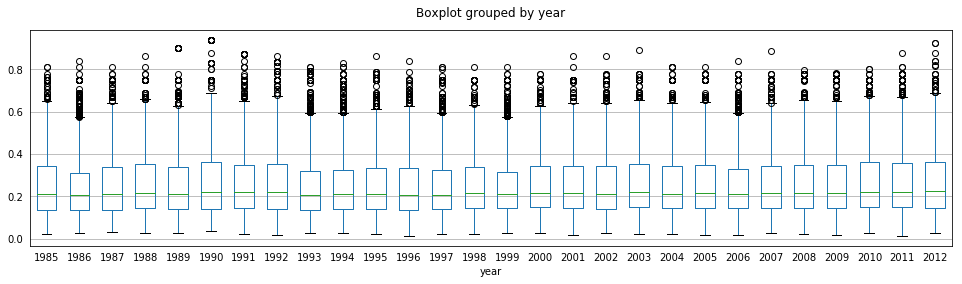

In [27]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_network_constraint_mean', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Shared Collaborators in Pairs

Scatter plot of `pair_shared_collaborators` features and `ypct`:

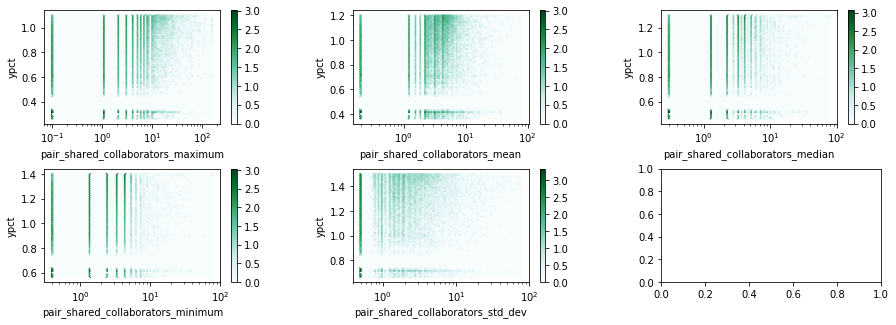

In [28]:
f = ['pair_shared_collaborators_maximum',
'pair_shared_collaborators_mean',
'pair_shared_collaborators_median',
'pair_shared_collaborators_minimum',
'pair_shared_collaborators_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    dfx = dfx.add(0.1, axis=[x])
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log', xscale='log')    

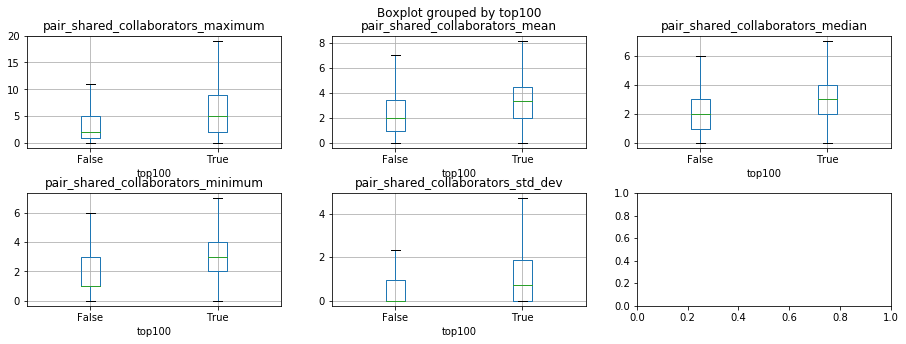

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

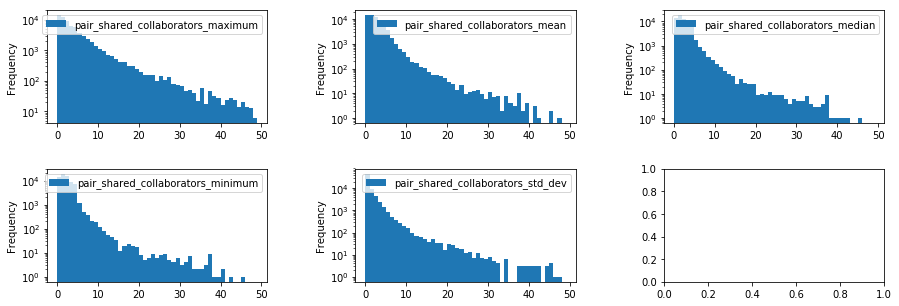

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], bins=range(0,50), logy=True)

In [31]:
dfx[f].corr()

,pair_shared_collaborators_maximum,pair_shared_collaborators_mean,pair_shared_collaborators_median,pair_shared_collaborators_minimum,pair_shared_collaborators_std_dev,ypct,year
pair_shared_collaborators_maximum,1.000000,0.794465,0.533277,0.447984,0.930193,0.193343,-0.006667
pair_shared_collaborators_mean,0.794465,1.000000,0.898231,0.836032,0.647647,0.206896,-0.008970
pair_shared_collaborators_median,0.533277,0.898231,1.000000,0.942914,0.288340,0.185227,-0.002906
pair_shared_collaborators_minimum,0.447984,0.836032,0.942914,1.000000,0.171909,0.192208,0.020816
pair_shared_collaborators_std_dev,0.930193,0.647647,0.288340,0.171909,1.000000,0.144226,-0.021722
ypct,0.193343,0.206896,0.185227,0.192208,0.144226,1.000000,0.119608
year,-0.006667,-0.008970,-0.002906,0.020816,-0.021722,0.119608,1.000000


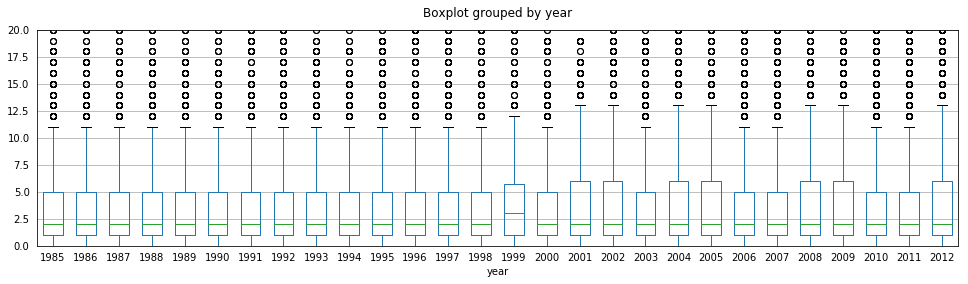

In [32]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('pair_shared_collaborators_maximum', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 20)
ax.xaxis.grid(False)

## Neighbour Overlap in Pairs

Scatter plot of `pair_neighbour_overlap` features and `ypct`:

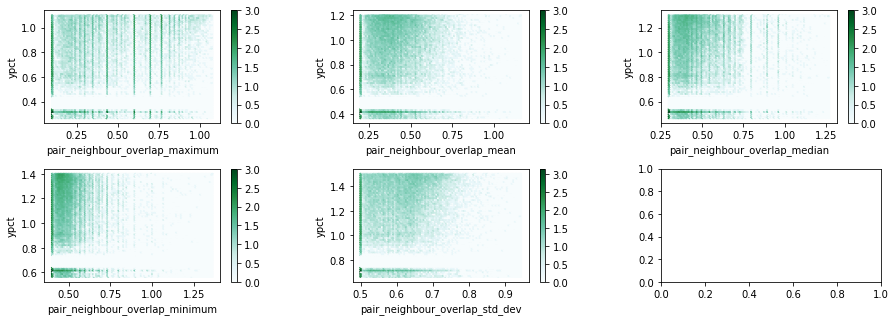

In [33]:
f = ['pair_neighbour_overlap_maximum',
'pair_neighbour_overlap_mean',
'pair_neighbour_overlap_median',
'pair_neighbour_overlap_minimum',
'pair_neighbour_overlap_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    dfx = dfx.add(0.1, axis=[x])
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')    

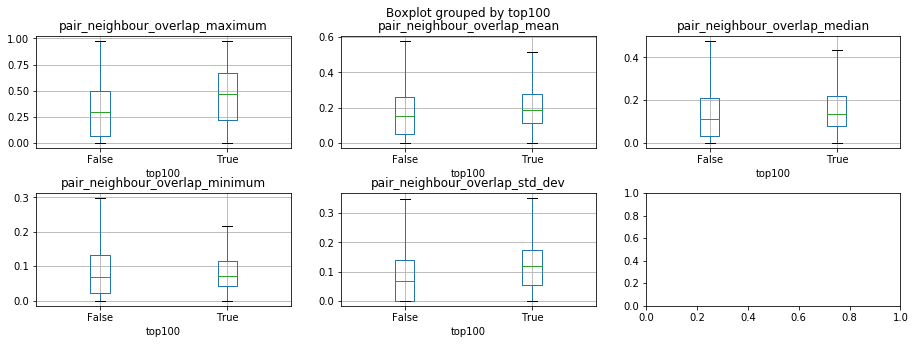

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

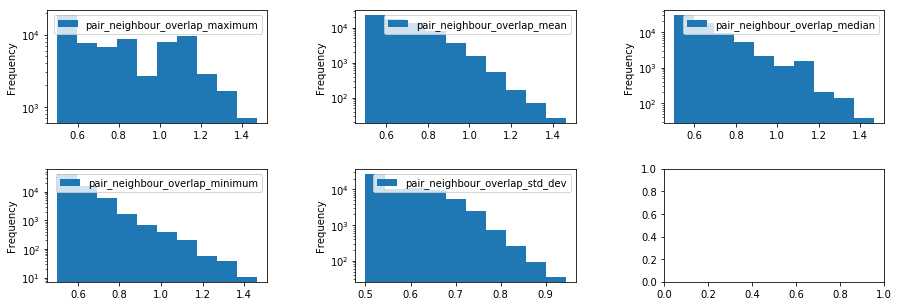

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [36]:
dfx[f].corr()

,pair_neighbour_overlap_maximum,pair_neighbour_overlap_mean,pair_neighbour_overlap_median,pair_neighbour_overlap_minimum,pair_neighbour_overlap_std_dev,ypct,year
pair_neighbour_overlap_maximum,1.000000,0.861835,0.712899,0.575215,0.894162,0.297633,0.134004
pair_neighbour_overlap_mean,0.861835,1.000000,0.943179,0.865519,0.651304,0.188864,0.120365
pair_neighbour_overlap_median,0.712899,0.943179,1.000000,0.859561,0.467237,0.142725,0.099306
pair_neighbour_overlap_minimum,0.575215,0.865519,0.859561,1.000000,0.234104,0.058645,0.079595
pair_neighbour_overlap_std_dev,0.894162,0.651304,0.467237,0.234104,1.000000,0.284254,0.119886
ypct,0.297633,0.188864,0.142725,0.058645,0.284254,1.000000,0.119608
year,0.134004,0.120365,0.099306,0.079595,0.119886,0.119608,1.000000


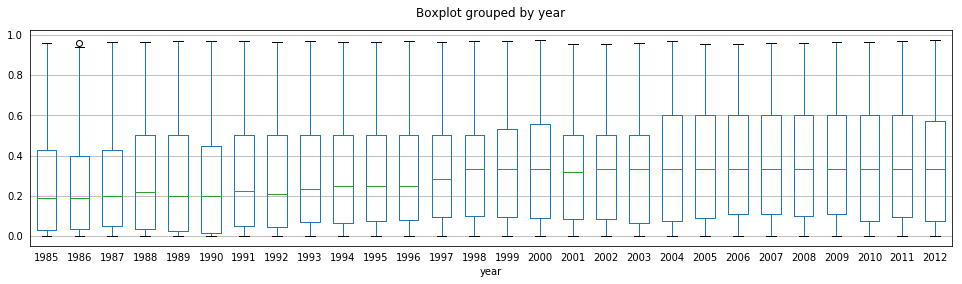

In [37]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('pair_neighbour_overlap_maximum', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Degree

Scatter plot of `degree` features and `ypct`:

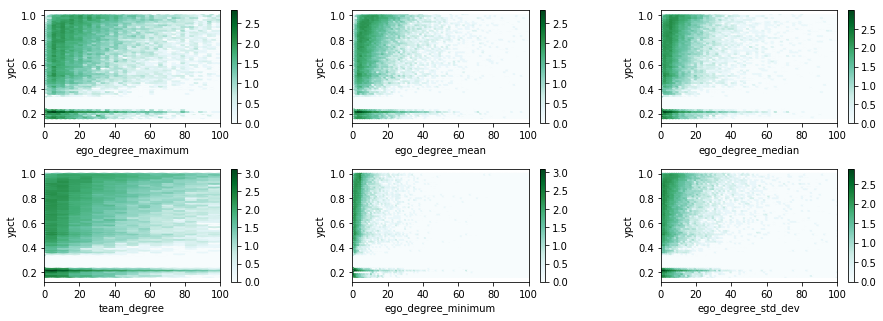

In [38]:
f = ['ego_degree_maximum',
'ego_degree_mean',
'ego_degree_median',
'team_degree',
'ego_degree_minimum',
'ego_degree_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    ax.set_xlim(0, 100)

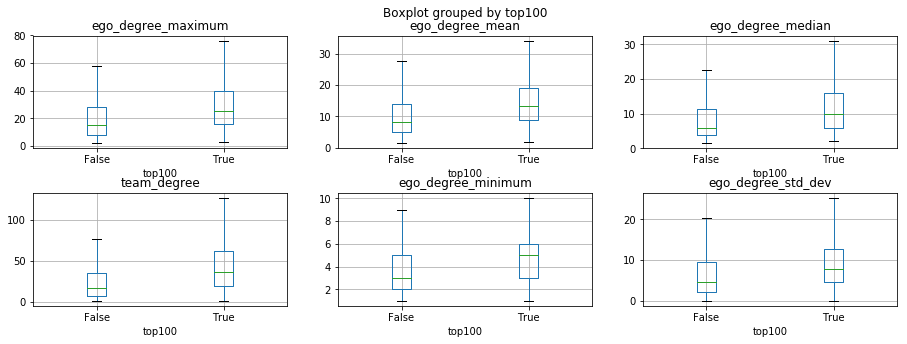

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

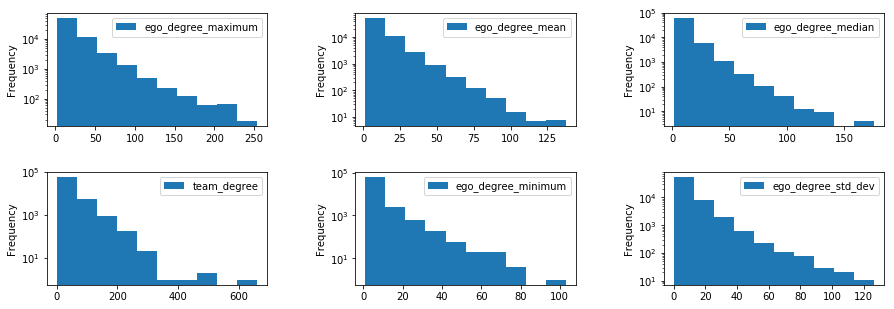

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [41]:
dfx[f].corr()

,ego_degree_maximum,ego_degree_mean,ego_degree_median,team_degree,ego_degree_minimum,ego_degree_std_dev,ypct,year
ego_degree_maximum,1.000000,0.910275,0.640345,0.939796,0.347129,0.967921,0.172679,-0.049713
ego_degree_mean,0.910275,1.000000,0.877411,0.916222,0.584959,0.846749,0.149908,-0.088287
ego_degree_median,0.640345,0.877411,1.000000,0.719398,0.610387,0.562878,0.104564,-0.101834
team_degree,0.939796,0.916222,0.719398,1.000000,0.442922,0.863462,0.213901,-0.054258
ego_degree_minimum,0.347129,0.584959,0.610387,0.442922,1.000000,0.152645,0.094574,-0.078895
ego_degree_std_dev,0.967921,0.846749,0.562878,0.863462,0.152645,1.000000,0.128945,-0.045856
ypct,0.172679,0.149908,0.104564,0.213901,0.094574,0.128945,1.000000,0.119608
year,-0.049713,-0.088287,-0.101834,-0.054258,-0.078895,-0.045856,0.119608,1.000000


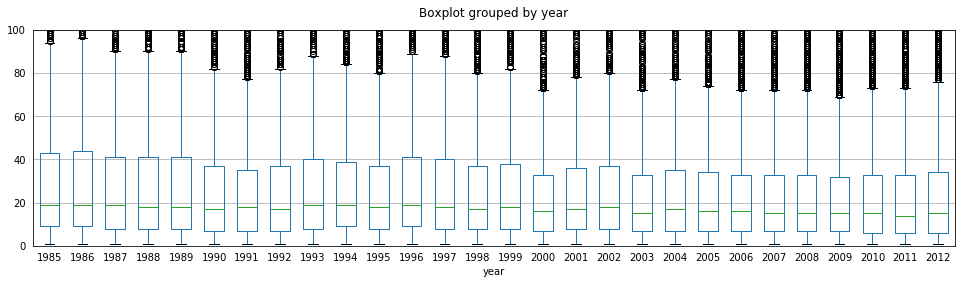

In [42]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_degree', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 100)
ax.xaxis.grid(False)

## Past Experience

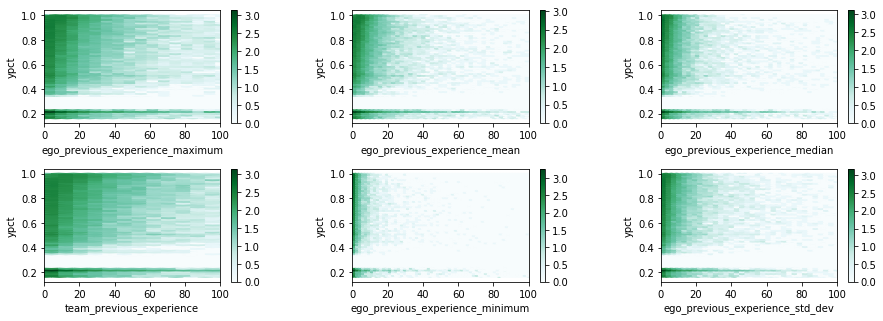

In [43]:
f = ['ego_previous_experience_maximum',
'ego_previous_experience_mean',
'ego_previous_experience_median',
'team_previous_experience',
'ego_previous_experience_minimum',
'ego_previous_experience_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    ax.set_xlim(0, 100)

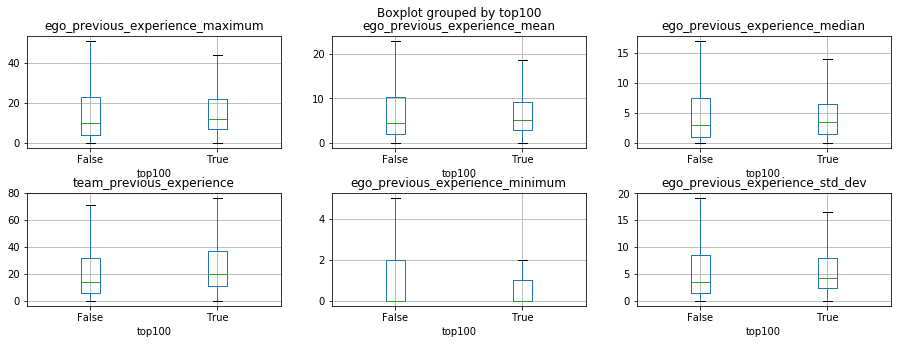

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

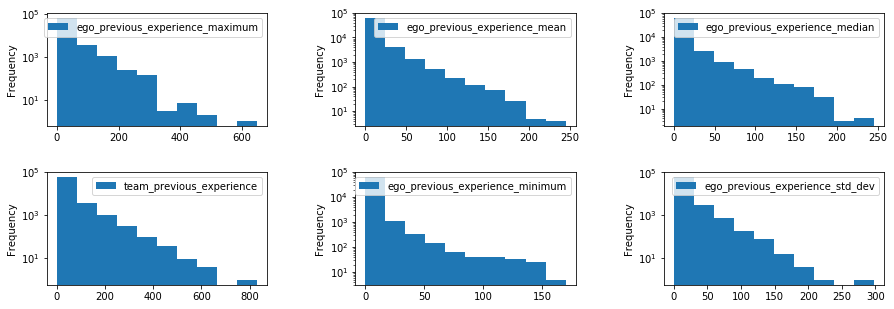

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [46]:
dfx[f].corr()

,ego_previous_experience_maximum,ego_previous_experience_mean,ego_previous_experience_median,team_previous_experience,ego_previous_experience_minimum,ego_previous_experience_std_dev,ypct,year
ego_previous_experience_maximum,1.000000,0.913786,0.712634,0.948960,0.415202,0.969926,-0.077513,-0.173085
ego_previous_experience_mean,0.913786,1.000000,0.920164,0.899159,0.678206,0.836644,-0.133656,-0.189880
ego_previous_experience_median,0.712634,0.920164,1.000000,0.741016,0.723614,0.619399,-0.151102,-0.176176
team_previous_experience,0.948960,0.899159,0.741016,1.000000,0.456753,0.884995,-0.037290,-0.179512
ego_previous_experience_minimum,0.415202,0.678206,0.723614,0.456753,1.000000,0.216758,-0.128092,-0.115393
ego_previous_experience_std_dev,0.969926,0.836644,0.619399,0.884995,0.216758,1.000000,-0.078747,-0.161280
ypct,-0.077513,-0.133656,-0.151102,-0.037290,-0.128092,-0.078747,1.000000,0.119608
year,-0.173085,-0.189880,-0.176176,-0.179512,-0.115393,-0.161280,0.119608,1.000000


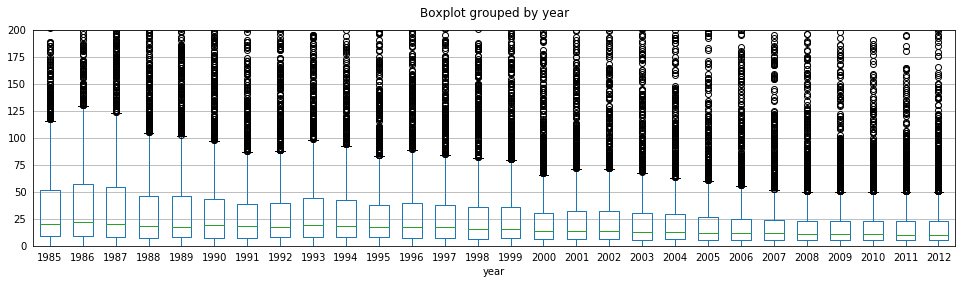

In [47]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_previous_experience', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 200)
ax.xaxis.grid(False)

## Betweenness 
`ego_betweenness_maximum`

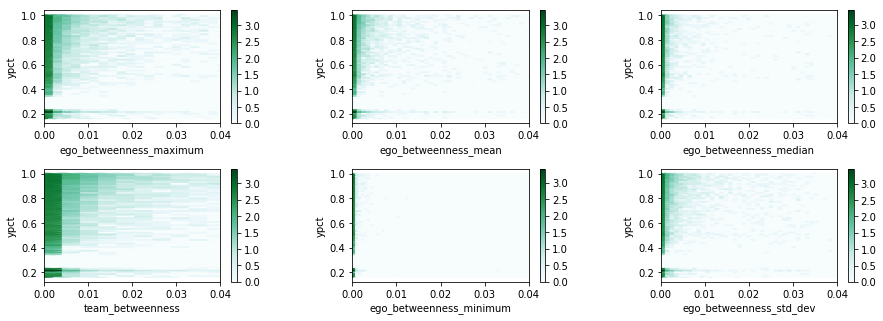

In [48]:
f = ['ego_betweenness_maximum',
'ego_betweenness_mean',
'ego_betweenness_median',
'team_betweenness',
'ego_betweenness_minimum',
'ego_betweenness_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    ax.set_xlim(0, 0.04)

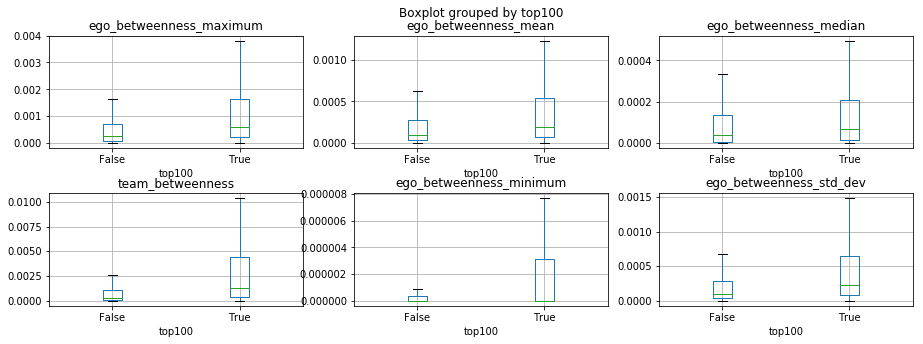

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

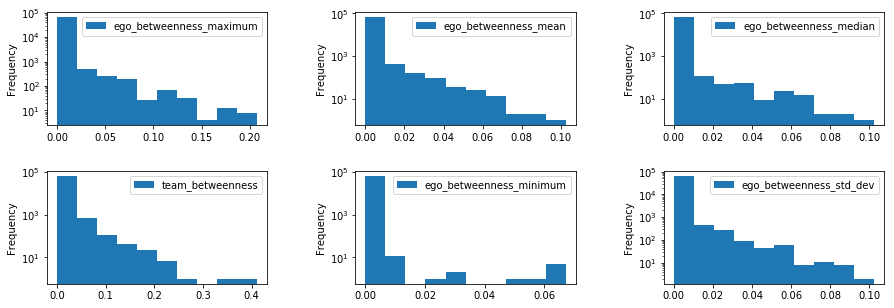

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [51]:
dfx[f].corr()

,ego_betweenness_maximum,ego_betweenness_mean,ego_betweenness_median,team_betweenness,ego_betweenness_minimum,ego_betweenness_std_dev,ypct,year
ego_betweenness_maximum,1.000000,0.926633,0.500627,0.550940,0.115309,0.990508,0.054309,-0.023678
ego_betweenness_mean,0.926633,1.000000,0.753862,0.492213,0.284575,0.933292,0.031077,-0.032386
ego_betweenness_median,0.500627,0.753862,1.000000,0.245754,0.372719,0.517052,-0.004719,-0.030137
team_betweenness,0.550940,0.492213,0.245754,1.000000,0.023121,0.538587,0.098211,-0.042193
ego_betweenness_minimum,0.115309,0.284575,0.372719,0.023121,1.000000,0.034951,-0.008231,-0.023695
ego_betweenness_std_dev,0.990508,0.933292,0.517052,0.538587,0.034951,1.000000,0.045528,-0.022542
ypct,0.054309,0.031077,-0.004719,0.098211,-0.008231,0.045528,1.000000,0.119608
year,-0.023678,-0.032386,-0.030137,-0.042193,-0.023695,-0.022542,0.119608,1.000000


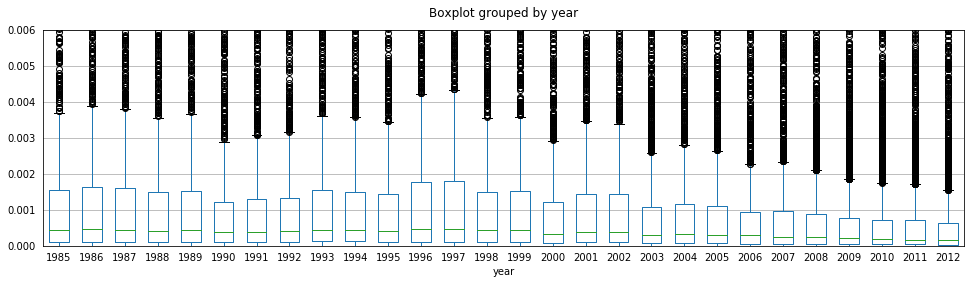

In [52]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_betweenness', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 0.006)
ax.xaxis.grid(False)

## Pair Past Experience

`pair_past_experience_mean`

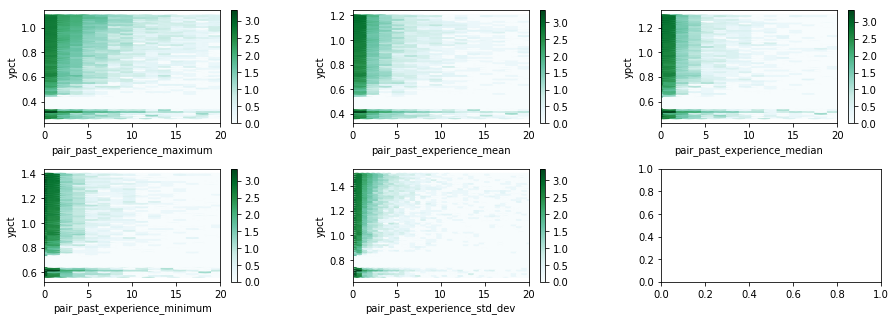

In [53]:
f = ['pair_past_experience_maximum',
'pair_past_experience_mean',
'pair_past_experience_median',
'pair_past_experience_minimum',
'pair_past_experience_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    dfx = dfx.add(0.1, axis=[x])
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    ax = dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')
    ax.set_xlim(0, 20)

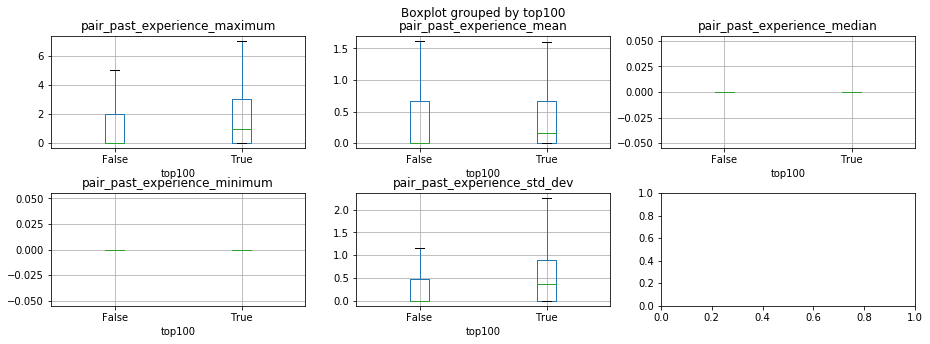

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

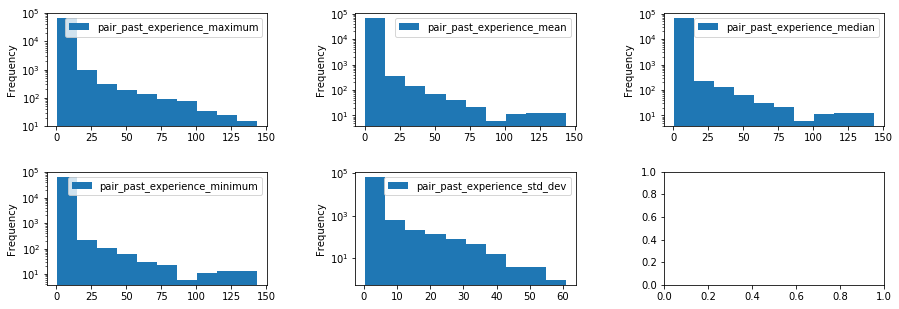

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [56]:
dfx[f].corr()

,pair_past_experience_maximum,pair_past_experience_mean,pair_past_experience_median,pair_past_experience_minimum,pair_past_experience_std_dev,ypct,year
pair_past_experience_maximum,1.000000,0.764449,0.618216,0.578269,0.805390,-0.005515,-0.060900
pair_past_experience_mean,0.764449,1.000000,0.968146,0.952884,0.308604,-0.104385,-0.057746
pair_past_experience_median,0.618216,0.968146,1.000000,0.986673,0.084702,-0.117950,-0.048273
pair_past_experience_minimum,0.578269,0.952884,0.986673,1.000000,0.024272,-0.120029,-0.041456
pair_past_experience_std_dev,0.805390,0.308604,0.084702,0.024272,1.000000,0.057240,-0.052517
ypct,-0.005515,-0.104385,-0.117950,-0.120029,0.057240,1.000000,0.119608
year,-0.060900,-0.057746,-0.048273,-0.041456,-0.052517,0.119608,1.000000


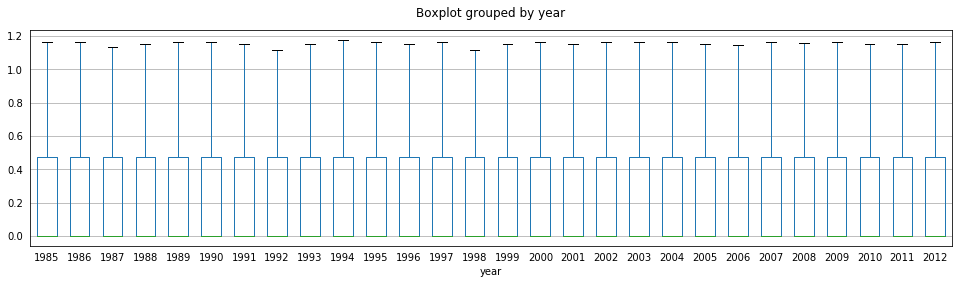

In [57]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('pair_past_experience_std_dev', by='year', figsize=(16,4), widths=0.6, showfliers=False)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.xaxis.grid(False)

## Clustering
`ego_clustering_maximum`

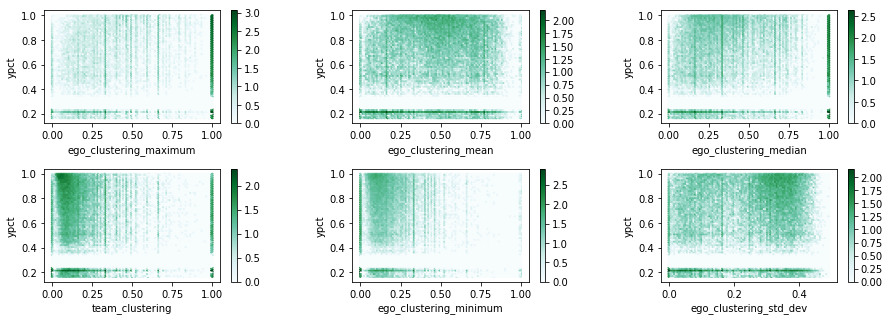

In [58]:
f = ['ego_clustering_maximum',
'ego_clustering_mean',
'ego_clustering_median',
'team_clustering',
'ego_clustering_minimum',
'ego_clustering_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')

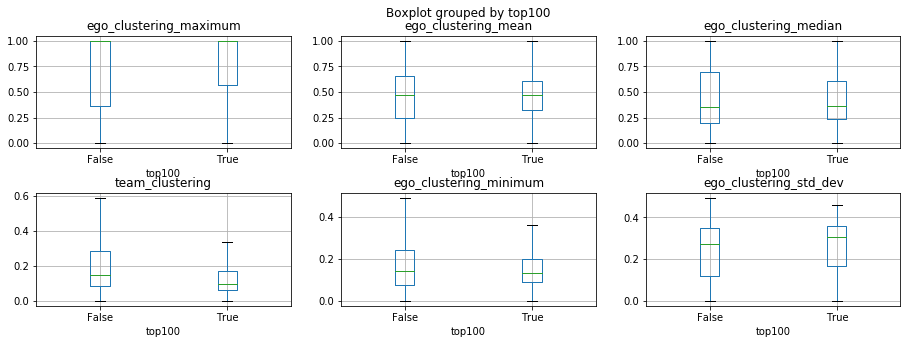

In [59]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

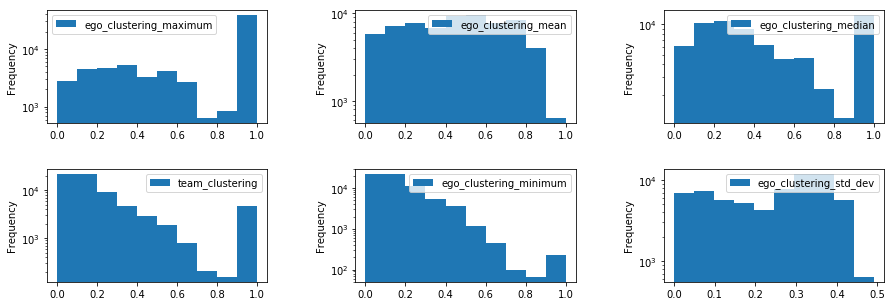

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [61]:
dfx[f].corr()

,ego_clustering_maximum,ego_clustering_mean,ego_clustering_median,team_clustering,ego_clustering_minimum,ego_clustering_std_dev,ypct,year
ego_clustering_maximum,1.000000,0.877144,0.690955,0.103179,0.465778,0.885589,0.217370,0.121131
ego_clustering_mean,0.877144,1.000000,0.925719,0.278097,0.684956,0.666919,0.146076,0.136747
ego_clustering_median,0.690955,0.925719,1.000000,0.305506,0.571283,0.529482,0.083807,0.125929
team_clustering,0.103179,0.278097,0.305506,1.000000,0.374528,-0.002622,-0.126034,0.099056
ego_clustering_minimum,0.465778,0.684956,0.571283,0.374528,1.000000,0.049027,0.060057,0.099603
ego_clustering_std_dev,0.885589,0.666919,0.529482,-0.002622,0.049027,1.000000,0.168001,0.082489
ypct,0.217370,0.146076,0.083807,-0.126034,0.060057,0.168001,1.000000,0.119608
year,0.121131,0.136747,0.125929,0.099056,0.099603,0.082489,0.119608,1.000000


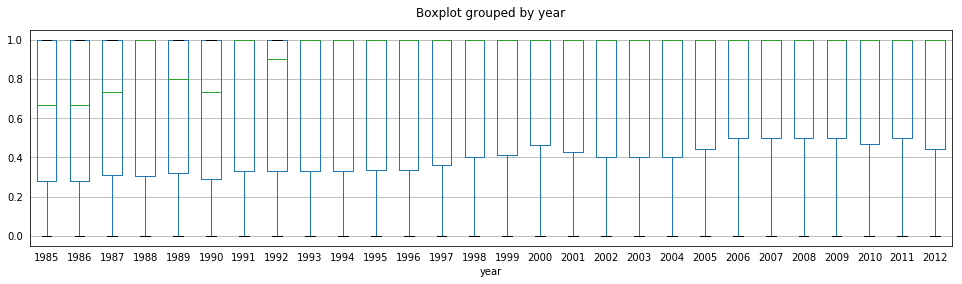

In [62]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('ego_clustering_maximum', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
#ax.set_ylim(0, 0.006)
ax.xaxis.grid(False)

## Square Clustering
`ego_square_clustering_maximum`

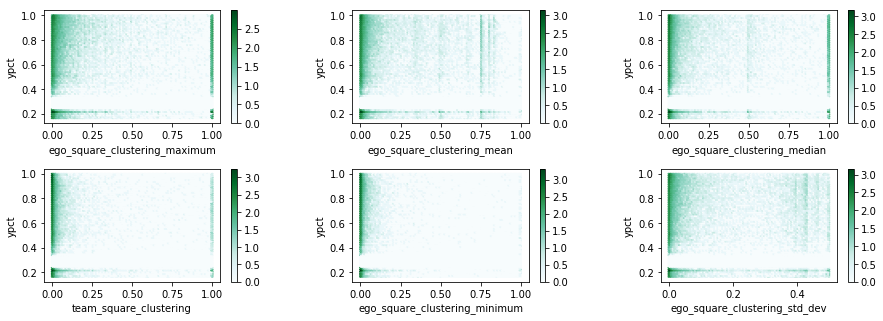

In [63]:
f = ['ego_square_clustering_maximum',
'ego_square_clustering_mean',
'ego_square_clustering_median',
'team_square_clustering',
'ego_square_clustering_minimum',
'ego_square_clustering_std_dev',
'ypct', 'year']
dfx = df[f]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx.plot.hexbin(ax=axes[index], x=x, y='ypct', bins='log')

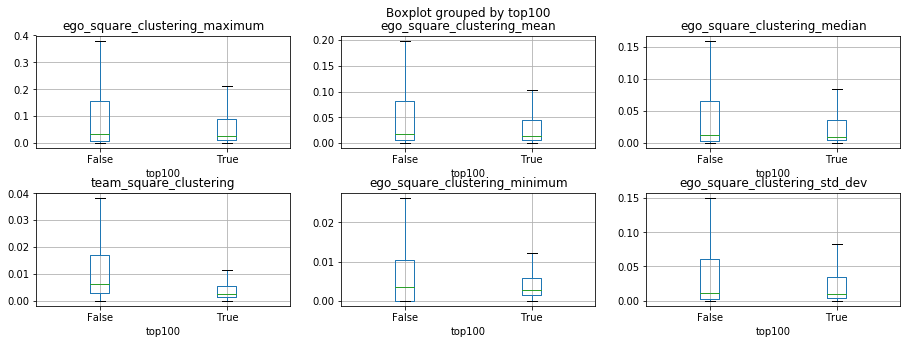

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    df.boxplot(x, by='top100', showfliers=False, ax=axes[index])

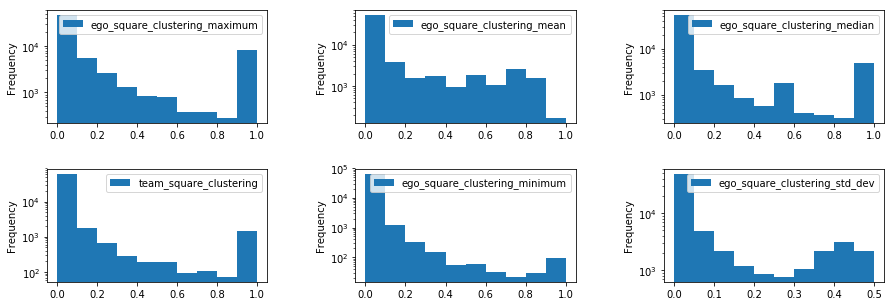

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, x in enumerate(f[:-2]):
    index = (0 if i < 3 else 1), (i if i < 3 else i-3)
    dfx[[x]].plot.hist(ax=axes[index], logy=True)

In [66]:
dfx[f].corr()

,ego_square_clustering_maximum,ego_square_clustering_mean,ego_square_clustering_median,team_square_clustering,ego_square_clustering_minimum,ego_square_clustering_std_dev,ypct,year
ego_square_clustering_maximum,1.000000,0.958891,0.881121,0.334349,0.383582,0.977734,0.009383,0.111597
ego_square_clustering_mean,0.958891,1.000000,0.970059,0.309444,0.444936,0.908115,0.008557,0.104262
ego_square_clustering_median,0.881121,0.970059,1.000000,0.261476,0.374053,0.836170,0.011346,0.092016
team_square_clustering,0.334349,0.309444,0.261476,1.000000,0.262167,0.326017,-0.081574,0.075022
ego_square_clustering_minimum,0.383582,0.444936,0.374053,0.262167,1.000000,0.213930,-0.020172,0.062186
ego_square_clustering_std_dev,0.977734,0.908115,0.836170,0.326017,0.213930,1.000000,0.006357,0.104404
ypct,0.009383,0.008557,0.011346,-0.081574,-0.020172,0.006357,1.000000,0.119608
year,0.111597,0.104262,0.092016,0.075022,0.062186,0.104404,0.119608,1.000000


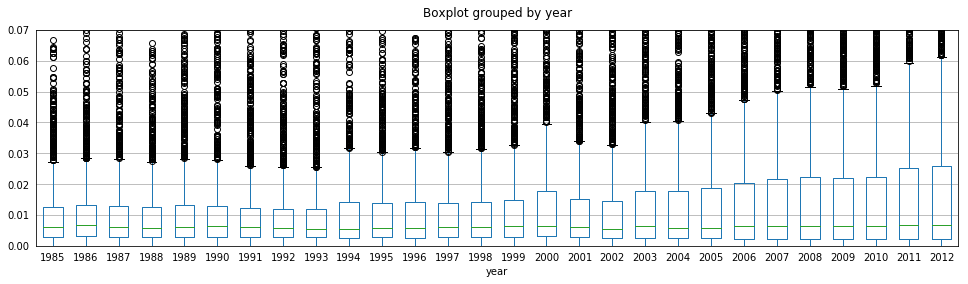

In [67]:
df['_year'] = df.year.map(lambda x: x - (x % 3 ))

ax = df.boxplot('team_square_clustering', by='year', figsize=(16,4), widths=0.6)
ax.tick_params(which='both', bottom='off', top='off', left='off', right='off')
ax.set_title('')
ax.set_ylim(0, 0.07)
ax.xaxis.grid(False)

## Year

Whach out for year of release. Since we have more movies the latter years, this happens:

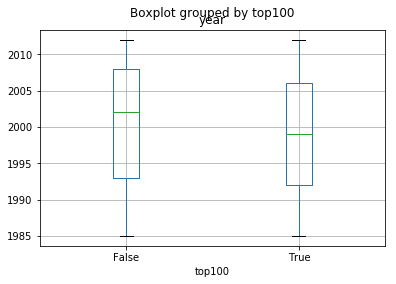

In [68]:
df.boxplot('year', by='top100', showfliers=False)